## Importing important module

In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os
import scipy.stats
import probscale

## Setting directories

In [93]:
simulation_subfolder = "single_population"
current_folder = os.getcwd()
home_folder = os.path.split(current_folder)[0]
simulation_subfolder = os.path.join(home_folder,simulation_subfolder)

##Result

Plotting the value of the two first PC for a panmictic population of 500 individuals and various number of snp.

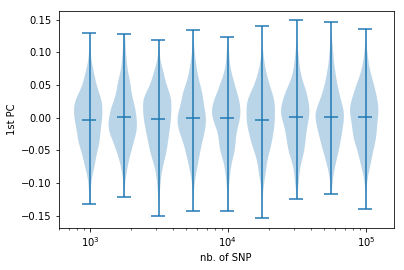

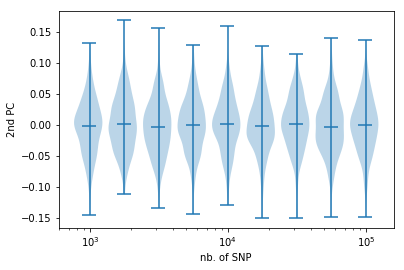

In [105]:
Ls = [int(10**(i/4)) for i in range(12,21)]
all_vector1 = []
all_vector2 = []
w = 0.2
width = lambda p, w: 10**(np.log10(p)+w/2.)-10**(np.log10(p)-w/2.)
for L in Ls:
    val,vec = pickle.load(open(os.path.join(simulation_subfolder, f'simplex/L_{L}/MDS_eigensystem/p2.vecs.data'),"rb"))
    all_vector1.append(vec[1])
    all_vector2.append(vec[2])
plt.xscale("log")
plt.violinplot(all_vector1,positions=Ls, widths=width(Ls,w),showmeans=True,showextrema=True)
plt.xlabel("nb. of SNP")
plt.ylabel("1st PC")
plt.savefig(os.path.join(simulation_subfolder, f'first_axis.pdf'))
plt.show()
plt.cla()
plt.xscale("log")
plt.xlabel("nb. of SNP")
plt.ylabel("2nd PC")
plt.violinplot(all_vector2,positions=Ls, widths=width(Ls,w),showmeans=True,showextrema=True)
plt.savefig(os.path.join(simulation_subfolder, f'second_axis.pdf'))

We now more formaly check that the distribution are gaussian (They look gaussian on the violin plot). We will see that this is actually the case (from the qq plot, no formal test are actually performed), and that the variance is given by the inverse of the number of individual in the population. Here, we just show the plot for 1000 and 100000 snp. 

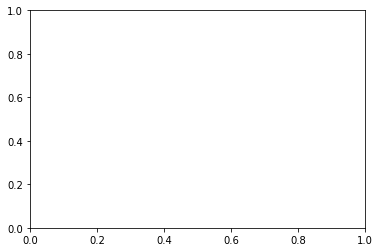

In [129]:
Ls = [int(10**(i/4)) for i in [12,20]] #regulary space with 4 point between each order of magnitude
all_vector = []
w = 0.1
width = lambda p, w: 10**(np.log10(p)+w/2.)-10**(np.log10(p)-w/2.)
for L in Ls:
    val,vec = pickle.load(open(os.path.join(simulation_subfolder, f'simplex/L_{L}/MDS_eigensystem/p1.vecs.data'),"rb"))
    data_plot = scipy.stats.probplot(np.sqrt(500)*vec[1])
    plt.plot(data_plot[0][0],data_plot[0][1],'o')
    plt.xlabel("theoretical quantiles")
    plt.ylabel("Ordered Values")
    x = np.arange(-3,3,0.1)
    y = data_plot[1][0]*x + data_plot[1][1]
    plt.plot(x,y)
    plt.savefig(os.path.join(simulation_subfolder, f'pp_plot_L_{L}.pdf'))
    plt.cla()

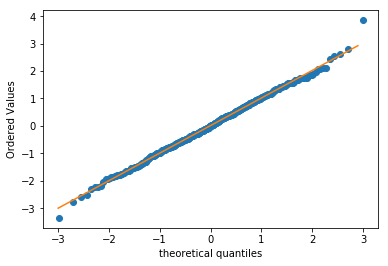